In [239]:
import folium
from folium import plugins
import pymongo
from pymongo import MongoClient
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
client=MongoClient()
db=client.Datab

In [240]:
datab=db.Datab


In [268]:
datos = list(datab.find({'$and':[{'number_of_employees':{'$gte': 100}},{'number_of_employees':{'$lt': 1000}},{'offices.latitude':{'$exists':True}}, {'offices.longitude':{'$exists':True}} ]},{'number_of_employees':1, 'name':1, '_id': 0,'crunchbase_url':1,'category_code':1, 'founded_year':1}).sort([('number_of_employees', -1)]).limit(20))
latitud = list(datab.find({'$and':[{'number_of_employees':{'$gte': 100}},{'number_of_employees':{'$lt': 1000}},{'offices.latitude':{'$exists':True}} ]},{'offices.latitude':1, '_id': 0}).sort([('number_of_employees', -1)]).limit(20))
longitud = list(datab.find({'$and':[{'number_of_employees':{'$gte': 100}},{'number_of_employees':{'$lt': 1000}}, {'offices.longitude':{'$exists':True}} ]},{'offices.longitude':1, '_id': 0}).sort([('number_of_employees', -1)]).limit(20))



In [269]:
latitudev = [37.411877, 37.425801, 42.3632, 37.694202, 37.4465496, 37.786183, 34.076061, 42.38532, 37.418491, 45.455322, 38.923453, 42.348691, 26.170422, 22.375372, -26.133971 , 42.36233, 35.116058 , 34.431454, 48.8975883, 37.283831]
longitudv = [-122.018277, -122.143701, -71.092378, -121.921532, -122.1709208, -122.402195, -118.372953, -71.207055,  -122.08744, 9.185502, -77.227525, -71.082523, -80.150794, 70.968241, 28.013040, -71.081527, -118.468736, -119.855405, 2.2827232, -121.957902]
estado = ['CA','CA', 'MA', 'CA', 'CA', 'CA', 'CA', 'MA', 'CA','CA','VA','MA','FL','INDIA','SUDAFRICA','MA','CA','CA','FRANCE','CA']


In [284]:
df = json_normalize(datos)
df = pd.DataFrame(datos)
df['StateCode'] = estado
df['Longitude'] = longitudv
df['Latitude'] = latitudev

In [285]:
df

,name,crunchbase_url,category_code,number_of_employees,founded_year,StateCode,Longitude,Latitude
0,Infinera Corporation,http://www.crunchbase.com/company/infinera,network_hosting,974,2000.0,CA,-122.018277,37.411877
1,Box,http://www.crunchbase.com/company/box,network_hosting,950,2005.0,CA,-122.143701,37.425801
2,Forrester Research,http://www.crunchbase.com/company/forrester-re...,consulting,903,1983.0,MA,-71.092378,42.363200
3,Workday,http://www.crunchbase.com/company/workday,enterprise,900,2005.0,CA,-121.921532,37.694202
4,InMobi,http://www.crunchbase.com/company/inmobi,mobile,900,2007.0,CA,-122.170921,37.446550
5,Yelp,http://www.crunchbase.com/company/yelp,search,800,2004.0,CA,-122.402195,37.786183
6,MySpace,http://www.crunchbase.com/company/myspace,network_hosting,800,2003.0,CA,-118.372953,34.076061
7,ZoomInfo,http://www.crunchbase.com/company/zoominfo,search,800,2000.0,MA,-71.207055,42.385320
8,Mozilla,http://www.crunchbase.com/company/mozilla,web,800,1998.0,CA,-122.087440,37.418491
9,Buongiorno,http://www.crunchbase.com/company/buongiorno,mobile,800,1999.0,CA,9.185502,45.455322


In [286]:
tabla = df.rename(columns={'name': 'Company', 'crunchbase_url': 'LinkCrunchBase', 'category_code':'Category', 'number_of_employees': 'Employees','founded_year':'FoundedYear'})
tabla.fillna(2000)


,Company,LinkCrunchBase,Category,Employees,FoundedYear,StateCode,Longitude,Latitude
0,Infinera Corporation,http://www.crunchbase.com/company/infinera,network_hosting,974,2000.0,CA,-122.018277,37.411877
1,Box,http://www.crunchbase.com/company/box,network_hosting,950,2005.0,CA,-122.143701,37.425801
2,Forrester Research,http://www.crunchbase.com/company/forrester-re...,consulting,903,1983.0,MA,-71.092378,42.363200
3,Workday,http://www.crunchbase.com/company/workday,enterprise,900,2005.0,CA,-121.921532,37.694202
4,InMobi,http://www.crunchbase.com/company/inmobi,mobile,900,2007.0,CA,-122.170921,37.446550
5,Yelp,http://www.crunchbase.com/company/yelp,search,800,2004.0,CA,-122.402195,37.786183
6,MySpace,http://www.crunchbase.com/company/myspace,network_hosting,800,2003.0,CA,-118.372953,34.076061
7,ZoomInfo,http://www.crunchbase.com/company/zoominfo,search,800,2000.0,MA,-71.207055,42.385320
8,Mozilla,http://www.crunchbase.com/company/mozilla,web,800,1998.0,CA,-122.087440,37.418491
9,Buongiorno,http://www.crunchbase.com/company/buongiorno,mobile,800,1999.0,CA,9.185502,45.455322


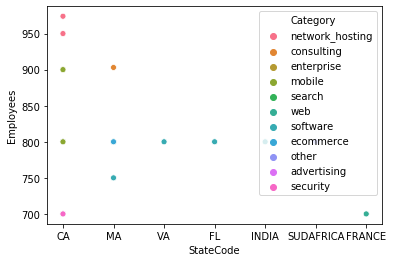

In [287]:
sns.scatterplot(x= 'StateCode',y='Employees',hue='Category',data= tabla)

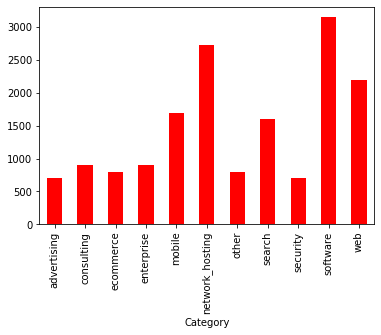

In [288]:
a = tabla.groupby('Category')['Employees'].sum()
a.plot.bar(color='red')

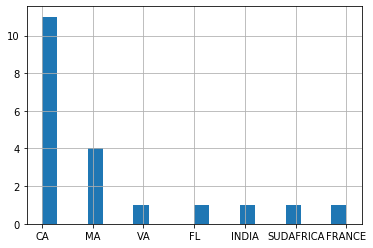

In [260]:
tabla['StateCode'].hist(bins=20)

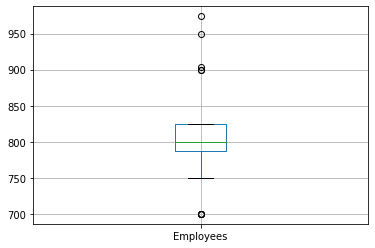

In [283]:
tabla.boxplot(column='Employees')

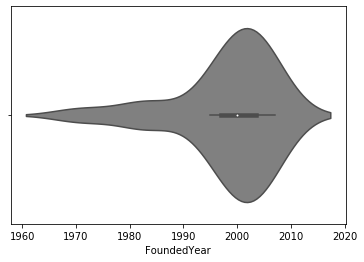

In [281]:
sns.violinplot("FoundedYear", data=tabla,color= 'gray')

In [316]:
mapa = folium.Map([37.774929,-122.4194183], zoom_start=7)

In [317]:
folium.CircleMarker([latitudev[0], longitudv[0]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[1], longitudv[1]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[2], longitudv[2]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[3], longitudv[3]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[4], longitudv[4]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[5], longitudv[5]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[6], longitudv[6]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[7], longitudv[7]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[8], longitudv[8]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[9], longitudv[9]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[10], longitudv[10]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[11], longitudv[11]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[12], longitudv[12]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[13], longitudv[13]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[14], longitudv[14]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[15], longitudv[15]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[16], longitudv[16]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[17], longitudv[17]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[18], longitudv[18]], radius=10, icon=folium.Icon()).add_to(mapa)
folium.CircleMarker([latitudev[19], longitudv[19]], radius=10, icon=folium.Icon()).add_to(mapa)

In [318]:
mapa
#Ubicación de las oficinas de las empresas en SanFrancisco California
#Empresas con mínimo 100 empleados y máximo 1000
#La mayoria de las empresas residen en San Fransisco California por lo que le veo una oportunidad muy grande al poner una oficina ahí
